<a href="https://colab.research.google.com/github/amalazimroshan/safepass/blob/main/safepass_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import torch
import numpy as np
from pathlib import Path
import pandas as pd

In [2]:
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/data_scene_flow.zip
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/data_scene_flow_calib.zip

--2024-10-28 16:53:59--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_scene_flow.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.170.253, 52.219.140.91, 3.5.136.2, ...
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.170.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1681488619 (1.6G) [application/zip]
Saving to: ‘data_scene_flow.zip’

data_scene_flow.zip 100%[===================>]   1.57G  21.8MB/s    in 79s     

2024-10-28 16:55:18 (20.4 MB/s) - ‘data_scene_flow.zip’ saved [1681488619/1681488619]

--2024-10-28 16:55:18--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_scene_flow_calib.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 3.5.136.9, 52.219.47.55, 52.219.169.57, ...
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|3.5.136.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16310

In [4]:
!unzip /content/data_scene_flow.zip
!unzip /content/data_scene_flow_calib.zip

Archive:  /content/data_scene_flow.zip
   creating: training/
   creating: training/disp_noc_1/
 extracting: training/disp_noc_1/000033_10.png  
 extracting: training/disp_noc_1/000076_10.png  
 extracting: training/disp_noc_1/000194_10.png  
 extracting: training/disp_noc_1/000137_10.png  
 extracting: training/disp_noc_1/000110_10.png  
 extracting: training/disp_noc_1/000188_10.png  
 extracting: training/disp_noc_1/000015_10.png  
 extracting: training/disp_noc_1/000155_10.png  
 extracting: training/disp_noc_1/000128_10.png  
 extracting: training/disp_noc_1/000162_10.png  
 extracting: training/disp_noc_1/000144_10.png  
 extracting: training/disp_noc_1/000052_10.png  
 extracting: training/disp_noc_1/000121_10.png  
 extracting: training/disp_noc_1/000193_10.png  
 extracting: training/disp_noc_1/000171_10.png  
 extracting: training/disp_noc_1/000101_10.png  
 extracting: training/disp_noc_1/000038_10.png  
 extracting: training/disp_noc_1/000030_10.png  
 extracting: training/

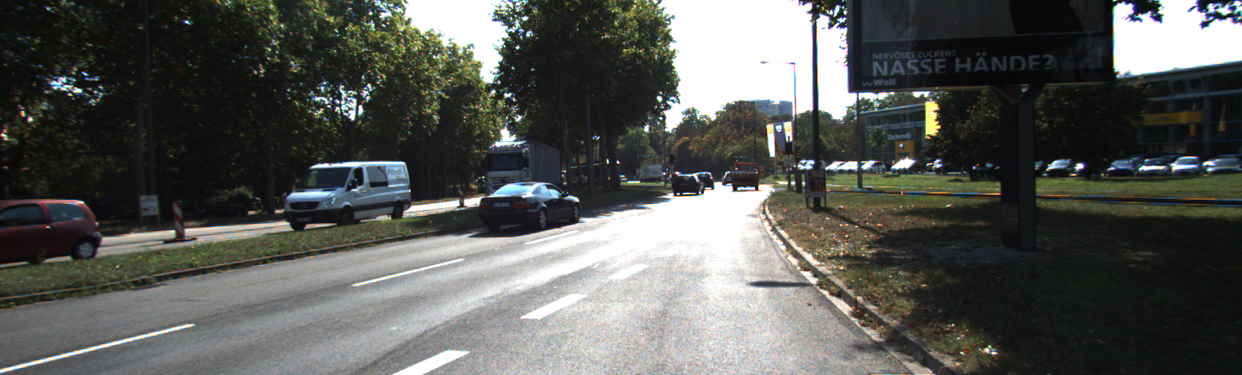

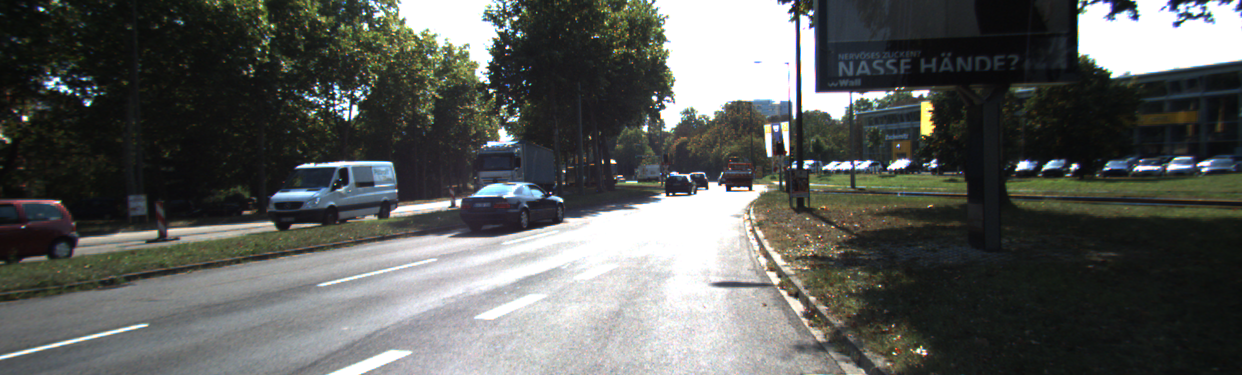

In [16]:
import os
from google.colab.patches import cv2_imshowos.listdir('/content/training/image_2')
# Load the image file
image_path_left = '/content/training/image_2/000089_11.png'
image_path_right = '/content/training/image_3/000089_11.png'

# Read the images using cv2.imread
left_image = cv2.imread(image_path_left)
right_image = cv2.imread(image_path_right)

# Display the images
cv2_imshow(left_image)
cv2_imshow(right_image)

In [32]:
class KITTIVehicleDetector:
  def __init__(self):
    self.model = torch.hub.load('ultralytics/yolov5','yolov5s',pretrained=True)
    self.model.classes = [2,5,7]
    self.model.conf = 0.25

    self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    self.model.to(self.device)

  def detect_vehicles(self, image):
    results = self.model(image)
    print('results')
    print(results)
    return results.xyxy[0].cpu().numpy()


In [33]:
class KITTIDataLoader:
  def __init__(self, base_path):
    self.base_path = Path(base_path)
    self.image_dir = self.base_path / 'image_2'
    self.images = sorted(self.image_dir.glob('*.png'))

  def __len__(self):
    return len(self.images)

  def get_image(self, idx):
    if idx>= len(self):
      return None
    return cv2.imread(str(self.images[idx]))

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-28 Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


/content/training/image_2
400
results
image 1/1: 375x1242 6 cars
Speed: 6.5ms pre-process, 438.8ms inference, 3.9ms NMS per image at shape (1, 3, 224, 640)


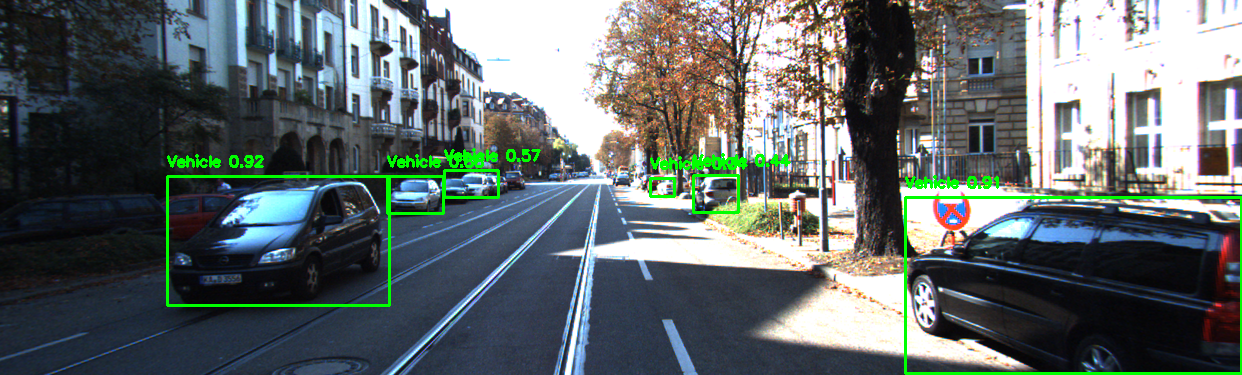

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


results
image 1/1: 375x1242 8 cars
Speed: 2.7ms pre-process, 402.0ms inference, 3.3ms NMS per image at shape (1, 3, 224, 640)


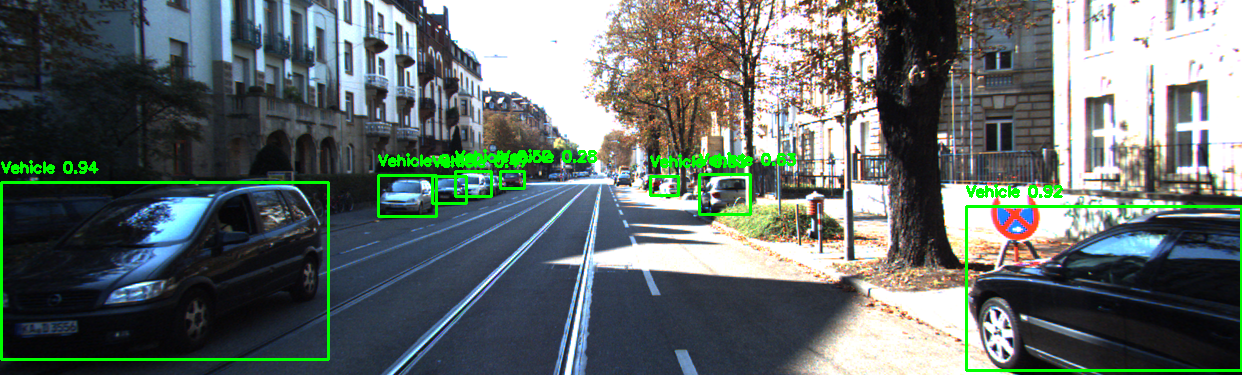

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


results
image 1/1: 375x1242 2 cars
Speed: 2.7ms pre-process, 465.3ms inference, 3.3ms NMS per image at shape (1, 3, 224, 640)


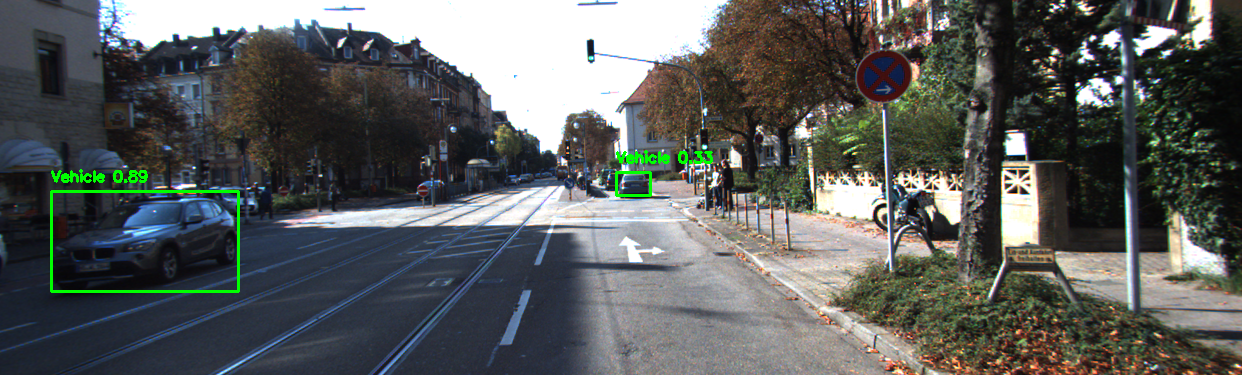

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


results
image 1/1: 375x1242 6 cars
Speed: 14.9ms pre-process, 516.9ms inference, 3.9ms NMS per image at shape (1, 3, 224, 640)


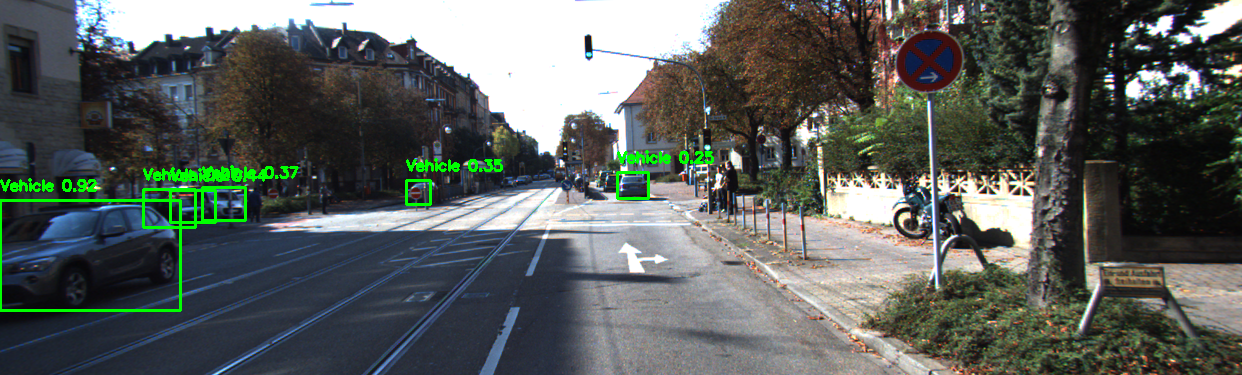

In [36]:
detector = KITTIVehicleDetector()
data_loader = KITTIDataLoader('/content/training')
# '/content/training/image_2/000089_11.png
print(len(data_loader))
for idx in range(len(data_loader)):
  if idx > 3:
    break
  image = data_loader.get_image(idx)
  if image is None:
    break

  detections = detector.detect_vehicles(image)

  for det in detections:
    x1, y1, x2, y2, conf, cls = det
    x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])

    cv2.rectangle(image, (x1,y1), (x2, y2), (0,255,0), 2)
    label = f'Vehicle {conf:.2f}'
    cv2.putText(image, label, (x1, y1-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
  cv2_imshow(image)